In [1]:
import numpy as np
import pandas as pd

## 데이터

In [2]:
df = pd.read_csv("OBS_ASOS_TIM_20230114170958.csv", encoding='cp949')

In [3]:
df.head()

,지점,지점명,일시,기온(°C),강수량(mm),풍속(m/s),습도(%),해면기압(hPa),시정(10m)
0,159,부산,2022-01-01 01:00,-2.0,NaN,3.6,24,1028.8,5000.0
1,159,부산,2022-01-01 02:00,-2.3,NaN,2.4,24,1029.3,5000.0
2,159,부산,2022-01-01 03:00,-2.8,NaN,3.5,27,1029.6,5000.0
3,159,부산,2022-01-01 04:00,-2.3,NaN,2.4,20,1029.0,5000.0
4,159,부산,2022-01-01 05:00,-2.2,NaN,4.2,19,1028.5,5000.0


In [4]:
df.shape

(8736, 9)

In [5]:
df.columns

Index(['지점', '지점명', '일시', '기온(°C)', '강수량(mm)', '풍속(m/s)', '습도(%)', '해면기압(hPa)',
       '시정(10m)'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8736 entries, 0 to 8735
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   지점         8736 non-null   int64  
 1   지점명        8736 non-null   object 
 2   일시         8736 non-null   object 
 3   기온(°C)     8736 non-null   float64
 4   강수량(mm)    580 non-null    float64
 5   풍속(m/s)    8710 non-null   float64
 6   습도(%)      8736 non-null   int64  
 7   해면기압(hPa)  8735 non-null   float64
 8   시정(10m)    8734 non-null   float64
dtypes: float64(5), int64(2), object(2)
memory usage: 614.4+ KB


In [7]:
df.drop(['지점', '지점명'], axis=1, inplace=True)

In [8]:
df.head()

,일시,기온(°C),강수량(mm),풍속(m/s),습도(%),해면기압(hPa),시정(10m)
0,2022-01-01 01:00,-2.0,NaN,3.6,24,1028.8,5000.0
1,2022-01-01 02:00,-2.3,NaN,2.4,24,1029.3,5000.0
2,2022-01-01 03:00,-2.8,NaN,3.5,27,1029.6,5000.0
3,2022-01-01 04:00,-2.3,NaN,2.4,20,1029.0,5000.0
4,2022-01-01 05:00,-2.2,NaN,4.2,19,1028.5,5000.0


In [9]:
df.index = pd.to_datetime(df['일시']).dt.floor('T')
df = df.iloc[:, 1:]

In [10]:
df.head()

,기온(°C),강수량(mm),풍속(m/s),습도(%),해면기압(hPa),시정(10m)
일시,,,,,,
2022-01-01 01:00:00,-2.0,NaN,3.6,24,1028.8,5000.0
2022-01-01 02:00:00,-2.3,NaN,2.4,24,1029.3,5000.0
2022-01-01 03:00:00,-2.8,NaN,3.5,27,1029.6,5000.0
2022-01-01 04:00:00,-2.3,NaN,2.4,20,1029.0,5000.0
2022-01-01 05:00:00,-2.2,NaN,4.2,19,1028.5,5000.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8736 entries, 2022-01-01 01:00:00 to 2022-12-31 00:00:00
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   기온(°C)     8736 non-null   float64
 1   강수량(mm)    580 non-null    float64
 2   풍속(m/s)    8710 non-null   float64
 3   습도(%)      8736 non-null   int64  
 4   해면기압(hPa)  8735 non-null   float64
 5   시정(10m)    8734 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 477.8 KB


In [12]:
df.isnull().sum()

기온(°C)          0
강수량(mm)      8156
풍속(m/s)        26
습도(%)           0
해면기압(hPa)       1
시정(10m)         2
dtype: int64

In [13]:
for col in ['강수량(mm)', '풍속(m/s)', '해면기압(hPa)', '시정(10m)']:
  df[col].fillna(df[col].mode()[0], inplace=True)

In [14]:
df.isnull().sum()

기온(°C)       0
강수량(mm)      0
풍속(m/s)      0
습도(%)        0
해면기압(hPa)    0
시정(10m)      0
dtype: int64

In [15]:
df.head()

,기온(°C),강수량(mm),풍속(m/s),습도(%),해면기압(hPa),시정(10m)
일시,,,,,,
2022-01-01 01:00:00,-2.0,0.0,3.6,24,1028.8,5000.0
2022-01-01 02:00:00,-2.3,0.0,2.4,24,1029.3,5000.0
2022-01-01 03:00:00,-2.8,0.0,3.5,27,1029.6,5000.0
2022-01-01 04:00:00,-2.3,0.0,2.4,20,1029.0,5000.0
2022-01-01 05:00:00,-2.2,0.0,4.2,19,1028.5,5000.0


In [16]:
df['일시 (월)'] = pd.to_datetime(df.index).month
df['일시 (일)'] = pd.to_datetime(df.index).day
df['일시 (시)'] = pd.to_datetime(df.index).hour

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [18]:
param_input = ['일시 (월)', '일시 (일)', '일시 (시)', '강수량(mm)', '풍속(m/s)', '습도(%)', '해면기압(hPa)', '시정(10m)']
param_output = '기온(°C)'

In [19]:
X_data = df[param_input]
y_data = df[param_output]

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=42)

In [20]:
scaler = StandardScaler()
scaler.fit(X_data)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 랜덤포레스트

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

In [29]:
rf = RandomForestRegressor(n_jobs=-1, random_state=42)
scores = cross_validate(rf, X_train_scaled, y_train, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9964482330495986 0.9744198046376141


In [31]:
rf.fit(X_train_scaled, y_train)
print(rf.score(X_train_scaled, y_train))
print(rf.score(X_test_scaled, y_test))

0.9970492456319845
0.979832464388811


In [25]:
from sklearn.model_selection import KFold
scores = cross_validate(rf, X_train_scaled, y_train, cv=KFold())
print(np.mean(scores['test_score']))

0.9746840616063359


In [26]:
splitter = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_validate(rf, X_train_scaled, y_train, cv=splitter)
print(np.mean(scores['test_score']))

0.9772740541686182


In [46]:
y_pred = rf.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
r2 = r2_score(y_test, y_pred)
print('MAE: {}'.format(mae))
print('MSE: {}'.format(mse))
print('RMSE: {}'.format(rmse))
print('R2 Score: {}'.format(r2))

MAE: 0.880231590995803
MSE: 1.5783567100343376
RMSE: 1.2563266732957385
R2 Score: 0.979832464388811


## 선형회귀

In [33]:
from sklearn.linear_model import LinearRegression

In [36]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
print(lr.score(X_train_scaled, y_train))
print(lr.score(X_test_scaled, y_test))

0.6212140578659651
0.6305605678498281


In [45]:
y_pred = lr.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
r2 = r2_score(y_test, y_pred)
print('MAE: {}'.format(mae))
print('MSE: {}'.format(mse))
print('RMSE: {}'.format(rmse))
print('R2 Score: {}'.format(r2))

MAE: 4.122617624819052
MSE: 28.913161128223866
RMSE: 5.377095975359178
R2 Score: 0.6305605678498281


## LSTM

In [38]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6115, 8)
(2621, 8)
(6115,)
(2621,)


In [39]:
from tensorflow import keras

In [40]:
model = keras.Sequential()

model.add(keras.layers.LSTM(8, input_shape=(8, 5001)))
model.add(keras.layers.Dense(1, activation='relu'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 8)                 160320    
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 160,329
Trainable params: 160,329
Non-trainable params: 0
_________________________________________________________________


In [41]:
train_seq = keras.utils.to_categorical(X_train)
val_seq = keras.utils.to_categorical(X_test)

In [42]:
print(train_seq.shape)
print(val_seq.shape)

(6115, 8, 5001)
(2621, 8, 5001)


In [43]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='mean_squared_error', metrics=['mse'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = model.fit(train_seq, y_train, epochs=500, batch_size=64, validation_data=(val_seq, y_test), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/500
96/96 [==============================] - 7s 47ms/step - loss: 317.4404 - mse: 317.4404 - val_loss: 310.8554 - val_mse: 310.8554
Epoch 2/500
96/96 [==============================] - 3s 35ms/step - loss: 315.2827 - mse: 315.2827 - val_loss: 308.5347 - val_mse: 308.5347
Epoch 3/500
96/96 [==============================] - 3s 35ms/step - loss: 312.6890 - mse: 312.6890 - val_loss: 305.6917 - val_mse: 305.6917
Epoch 4/500
96/96 [==============================] - 3s 36ms/step - loss: 309.4889 - mse: 309.4889 - val_loss: 302.1897 - val_mse: 302.1897
Epoch 5/500
96/96 [==============================] - 3s 36ms/step - loss: 305.5574 - mse: 305.5574 - val_loss: 297.8954 - val_mse: 297.8954
Epoch 6/500
96/96 [==============================] - 3s 36ms/step - loss: 300.7121 - mse: 300.7121 - val_loss: 292.5975 - val_mse: 292.5975
Epoch 7/500
96/96 [==============================] - 3s 36ms/step - loss: 294.8482 - mse: 294.8482 - val_loss: 286.2400 - val_mse: 286.2400
Epoch 8/500
96/96 [=

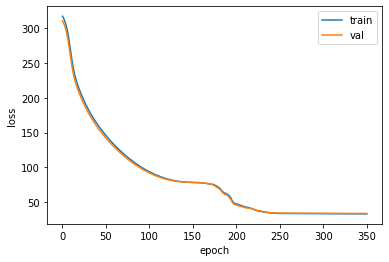

In [48]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()